# Import Library

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from keras.utils import to_categorical
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os 
import cv2 as cv
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Load Dataset

In [4]:
path = "dataset/"
images = []
names = []

for folders in os.listdir(path):
    files = os.listdir(os.path.join(path, folders))
    for i, name in enumerate(files):
        if name.find(".jpg") > -1 :
            img = cv.imread(os.path.join(path + folders, name), cv.IMREAD_GRAYSCALE)
            images.append(img)
            names.append(folders)
    print(f"{len(files)} Samples\t label : {folders}")
print(len(names))

0 Samples	 label : .ipynb_checkpoints
1000 Samples	 label : Harsel Octavian
1000 Samples	 label : Latif Ma'ruf
1000 Samples	 label : Muhammad Rizqi
1000 Samples	 label : Ravel Ariondo
1000 Samples	 label : Robi Ardiansyah
1000 Samples	 label : syahrul Gunawan Ramdhani
1000 Samples	 label : Tatas Handaru
7000


# Data Augmentation
The augmentation techniques used are rotation, translation and brightness adjustment.

In [4]:
def Augmentation(img):
    imgs = []
    h, w = img.shape
    center = (h // 2, w // 2)
    rotation_5 = cv.getRotationMatrix2D(center, 5, 1.0)
    rota_neg_5 = cv.getRotationMatrix2D(center, -5, 1.0)
    rotation_10 = cv.getRotationMatrix2D(center, 10, 1.0)
    rota_neg_10 = cv.getRotationMatrix2D(center, -10, 1.0)

    translation_3 = np.float32([[1, 0, 3], [0, 1, 0]])
    trans_neg_3 = np.float32([[1, 0, -3], [0, 1, 0]])
    translation_6 = np.float32([[1, 0, 6], [0, 1, 0]])
    trans_neg_6 = np.float32([[1, 0, -6], [0, 1, 0]])

    translation_y3 = np.float32([[1, 0, 0], [0, 1, 3]])
    trans_neg_y3 = np.float32([[1, 0, 0], [0, 1, -3]])
    translation_y6 = np.float32([[1, 0, 0], [0, 1, 6]])
    trans_neg_y6 = np.float32([[1, 0, 0], [0, 1, -6]])

    imgs.append(cv.warpAffine(img, rotation_5, (w, h)))
    imgs.append(cv.warpAffine(img, rota_neg_5, (w, h)))
    imgs.append(cv.warpAffine(img, rotation_10, (w, h)))
    imgs.append(cv.warpAffine(img, rota_neg_10, (w, h)))
    imgs.append(cv.warpAffine(img, translation_3, (w, h)))
    imgs.append(cv.warpAffine(img, trans_neg_3, (w, h)))
    imgs.append(cv.warpAffine(img, translation_6, (w, h)))
    imgs.append(cv.warpAffine(img, trans_neg_6, (w, h)))
    imgs.append(cv.warpAffine(img, translation_y3, (w, h)))
    imgs.append(cv.warpAffine(img, trans_neg_y3, (w, h)))
    imgs.append(cv.warpAffine(img, translation_y6, (w, h)))
    imgs.append(cv.warpAffine(img, trans_neg_y6, (w, h)))

    imgs.append(cv.add(img, 10))
    imgs.append(cv.add(img, -10))
    imgs.append(cv.add(img, 30))
    imgs.append(cv.add(img, -30))
    imgs.append(cv.add(img, 15))
    imgs.append(cv.add(img, -15))
    imgs.append(cv.add(img, 45))
    imgs.append(cv.add(img, -45))
    
    return imgs

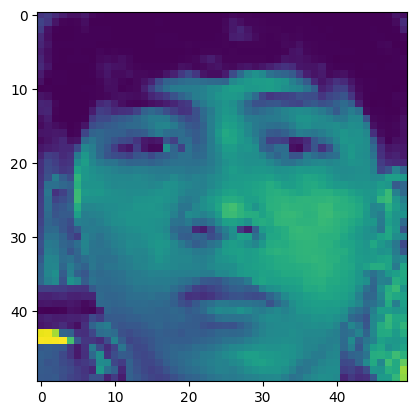

In [13]:
plt.imshow(images[5000])

In [14]:
images[5000].shape

(50, 50)

## Check augmentation result

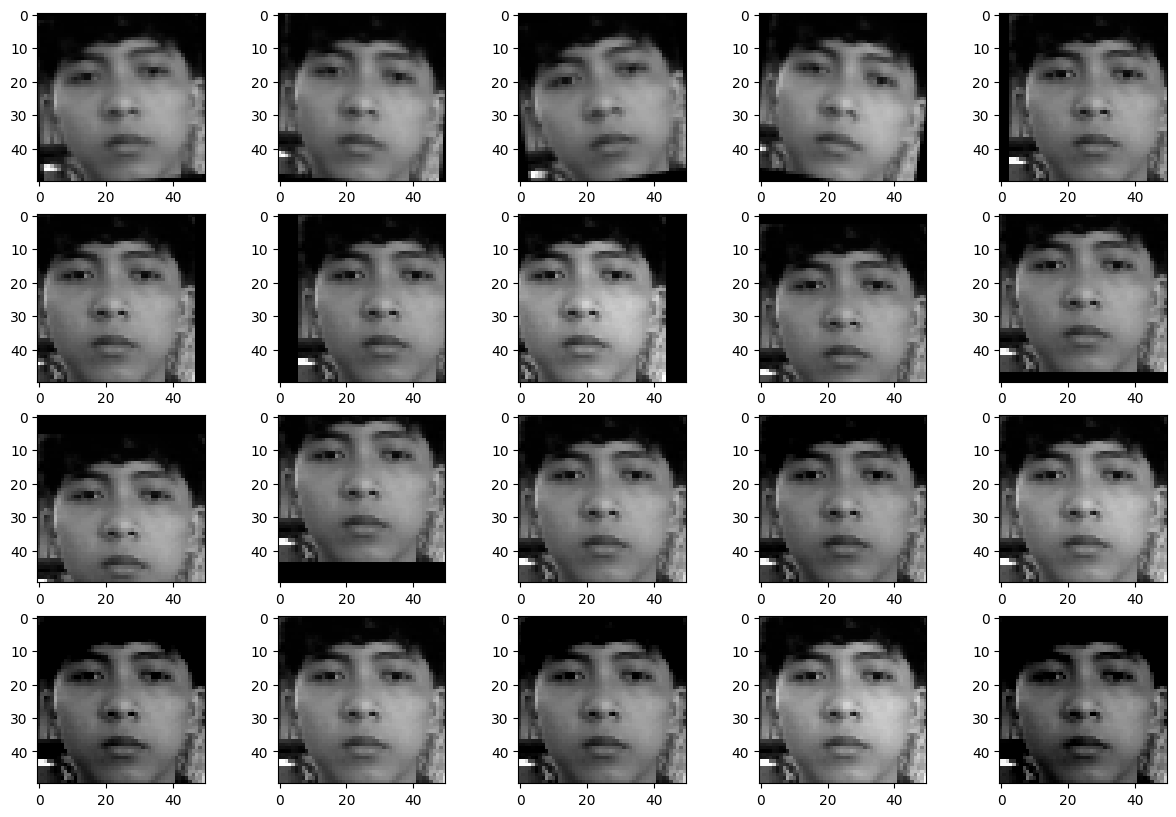

In [15]:
imgs = images[5000]
img_aug = Augmentation(imgs)

plt.figure(figsize=(15,10))
for i, img in enumerate(img_aug):
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap="gray")
plt.show()

## Apply augmentation to all images

In [9]:
augmen_images = []
augmen_names = []

for i, image in enumerate(images):
    try:
        augmen_images.extend(Augmentation(image))
        augmen_names.extend([names[i]]*20)
    except:
        print(i)

In [10]:
images.extend(augmen_images)
names.extend(augmen_names)

In [11]:
len(images), len(names)

(147000, 147000)

## Check the number of images for each class after augmentation

In [12]:
uniq, count = np.unique(names, return_counts=True)
for i in zip(uniq, count):
    print(i)

('Harsel Octavian', 21000)
("Latif Ma'ruf", 21000)
('Muhammad Rizqi', 21000)
('Ravel Ariondo', 21000)
('Robi Ardiansyah', 21000)
('Tatas Handaru', 21000)
('syahrul Gunawan Ramdhani', 21000)


In [13]:
len(names)

147000

# Label encoder
It is a technique for converting categorical variables into numerical values. This technique is an efficient way to convert categorical data into numerical data that can be used for modeling and analysis.

In [5]:
# label encoder 
le = LabelEncoder()
le.fit(names)
labels = le.classes_
name_vec = le.transform(names)
categorical_names = to_categorical(name_vec)

In [6]:
print(f"Number of class : {len(labels)}")
print(labels)

Number of class : 7
['Harsel Octavian' "Latif Ma'ruf" 'Muhammad Rizqi' 'Ravel Ariondo'
 'Robi Ardiansyah' 'Tatas Handaru' 'syahrul Gunawan Ramdhani']


In [7]:
print(categorical_names)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Split Data

In [ ]:
# split data 
x_train, x_test, y_train, y_test = train_test_split(np.array(images, dtype=np.float32), 
                                                    np.array(categorical_names), 
                                                    test_size=0.3, random_state=42)

In [18]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(102900, 50, 50) (102900, 7) (44100, 50, 50) (44100, 7)


In [19]:
x_train = np.reshape(x_train, (len(x_train), 50, 50, -1))
x_test = np.reshape(x_test, (len(x_test), 50, 50, -1))

In [20]:
x_train.shape, x_test.shape

((102900, 50, 50, 1), (44100, 50, 50, 1))

# Build CNN Model

In [ ]:
def model_Cnn(input_shape):
    model = Sequential()

    model.add(Conv2D(32,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape = input_shape))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64,
                    (3,3),
                    padding="valid",
                    activation="relu",
                    input_shape = input_shape))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(128,
                    (3, 3),
                    padding="valid",
                    activation="relu"))
    model.add(Conv2D(128,
                    (3, 3),
                    padding="valid",
                    activation="relu"))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(len(labels)))
    model.add(Activation("softmax"))

    model.summary()
    model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


# Train CNN Model

In [22]:
# training model cnn 
input_shape = x_train[0].shape

Epoch = 10
Batch_Size = 42

model = model_Cnn(input_shape)

history = model.fit(x_train,
                    y_train,
                    epochs=Epoch,
                    batch_size=Batch_Size,
                    shuffle=True,
                    validation_split=0.15
                    )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         1

# Evalutate model

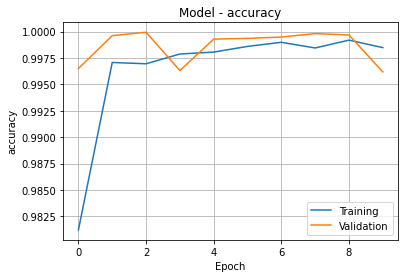

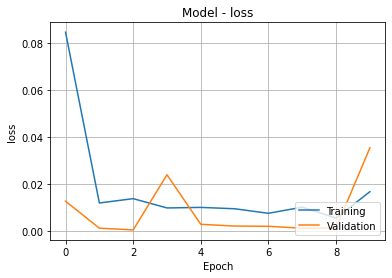

In [23]:
def evaluate_model(history1):
    names = [['accuracy', 'val_accuracy'],
            ['loss', 'val_loss']]
    
    for name in names:
        fig1, ax_acc = plt.subplots()
        plt.plot(history1.history[name[0]])
        plt.plot(history1.history[name[1]])
        plt.xlabel('Epoch')
        plt.ylabel(name[0])
        plt.title(f'Model - {name[0]}')
        plt.legend(['Training', 'Validation'], loc='lower right')
        plt.grid()
        plt.show()

evaluate_model(history)

In [24]:
model.save("Model_CNN_7class.h5")

In [25]:
pred = model.predict(x_test)

1379/1379 [==============================] - 20s 14ms/step


In [26]:
print(classification_report(y_test.argmax(axis=1), 
                            pred.argmax(axis=1), 
                            target_names=labels))

                          precision    recall  f1-score   support

         Harsel Octavian       1.00      0.99      0.99      6204
            Latif Ma'ruf       1.00      1.00      1.00      6455
          Muhammad Rizqi       1.00      0.99      1.00      6300
           Ravel Ariondo       1.00      1.00      1.00      6250
         Robi Ardiansyah       1.00      1.00      1.00      6341
           Tatas Handaru       0.99      1.00      0.99      6269
syahrul Gunawan Ramdhani       0.99      1.00      0.99      6281

                accuracy                           1.00     44100
               macro avg       1.00      1.00      1.00     44100
            weighted avg       1.00      1.00      1.00     44100



In [27]:
def confusionmatrix(cm, clasess, 
                     normalize = False,
                     title = 'confusion matrix',
                     cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[np.newaxis]
        
    plt.figure(figsize=(30,30))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    
    marks = np.arange(len(clasess))
    plt.xticks(marks, clasess, rotation=45)
    plt.yticks(marks, clasess)
    
    fmt = '.2f' if normalize else 'd'
    thres = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center',
                color='white' if cm[i, j] > thres else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predict label")
    plt.show()

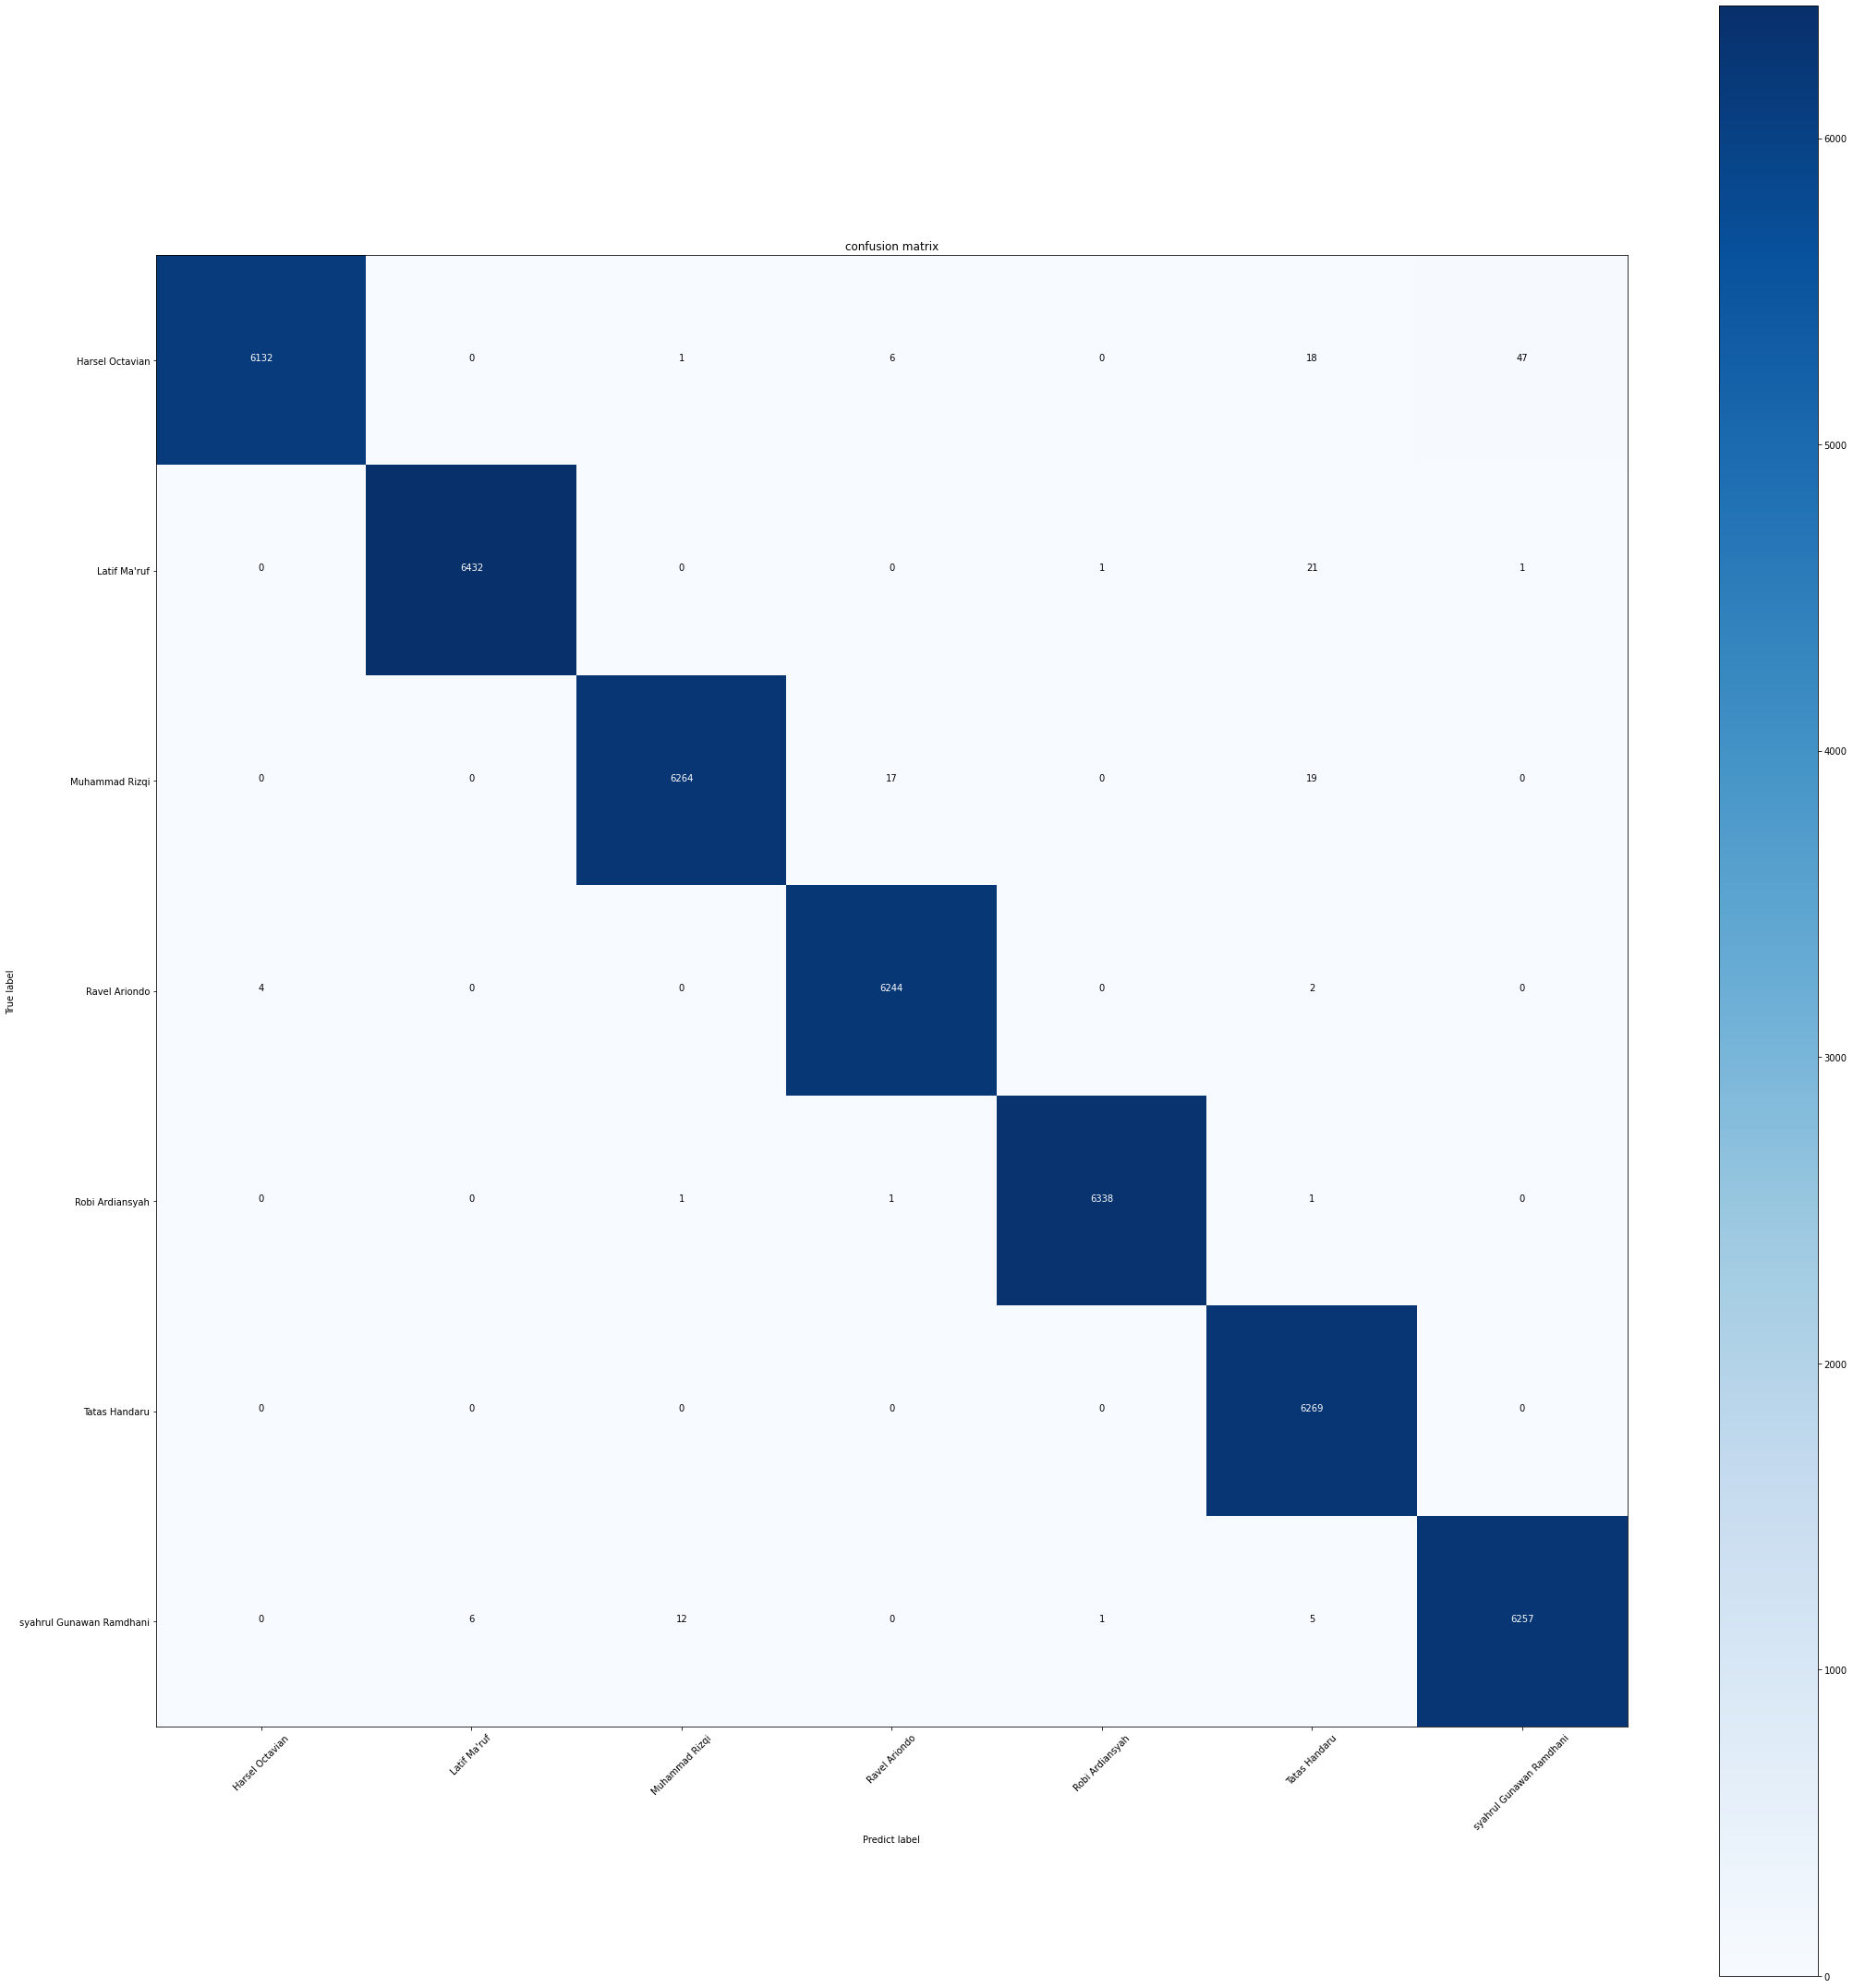

In [28]:
matrix = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
np.set_printoptions(precision=2)

confusionmatrix(matrix, clasess = labels, normalize=False, title='confusion matrix')

# Testing Model

In [12]:
from keras.models import load_model
from keras.optimizers import Adam

In [13]:
def draw_ped(img, label, x0, y0, xt, yt, color=(255,127,0), text_color=(255,255,255)):

    (w, h), baseline = cv.getTextSize(label, cv.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv.rectangle(img,
                  (x0, y0 + baseline),  
                  (max(xt, x0 + w), yt), 
                  color, 
                  2)
    cv.rectangle(img,
                  (x0, y0 - h),  
                  (x0 + w, y0 + baseline), 
                  color, 
                  -1)  
    cv.putText(img, 
                label, 
                (x0, y0),                   
                cv.FONT_HERSHEY_SIMPLEX,     
                0.5,                          
                text_color,                
                1,
                cv.LINE_AA) 
    return img

In [ ]:
# --------- load Haar Cascade model -------------
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

# --------- load Keras CNN model -------------
model = load_model("Model_CNN_7class.h5", custom_objects={'adam': Adam})
print("[INFO] finish load model...")

cap = cv.VideoCapture(0)
while cap.isOpened() :
    ret, frame = cap.read()
    if ret:
        gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x, y, w, h) in faces:
            
            face_img = gray[y:y+h, x:x+w]
            face_img = cv.resize(face_img, (50, 50))
            face_img = face_img.reshape(1, 50, 50, -1)

            
            result = model.predict(face_img)
            idx = result.argmax(axis=1)
            confidence = result.max(axis=1)*100
            if confidence > 90:
                label_text = "%s (%.2f %%)" % (labels[idx], confidence)
            else :
                label_text = "N/A"
            frame = draw_ped(frame, label_text, x, y, x + w, y + h, color=(0,255,255), text_color=(50,50,50))
       
        cv.imshow('Detect Face', frame)
    else :
        break
    if cv.waitKey(10) == ord('q'):
        break
        
cv.destroyAllWindows()
cap.release()